### 1. Carregando Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import plot_model
from keras.utils import  to_categorical
from tensorflow.keras import regularizers

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


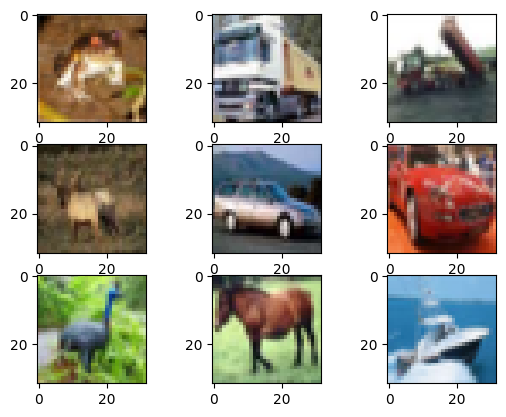

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

In [ ]:
x_train.shape

(45000, 32, 32, 3)

In [ ]:
x_valid.shape

(5000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

Impressão da forma do conjunto de treino

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

45000 train samples
10000 test samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [ ]:

# Definir o modelo
model = Sequential()

# Primeira camada convolucional
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Segunda camada convolucional
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Terceira camada convolucional
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Quarta camada convolucional
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Camada Flatten
model.add(Flatten())

# Primeira camada densa
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))

# Segunda camada densa
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))


# Camada de saída
model.add(Dense(10, activation='softmax'))


Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

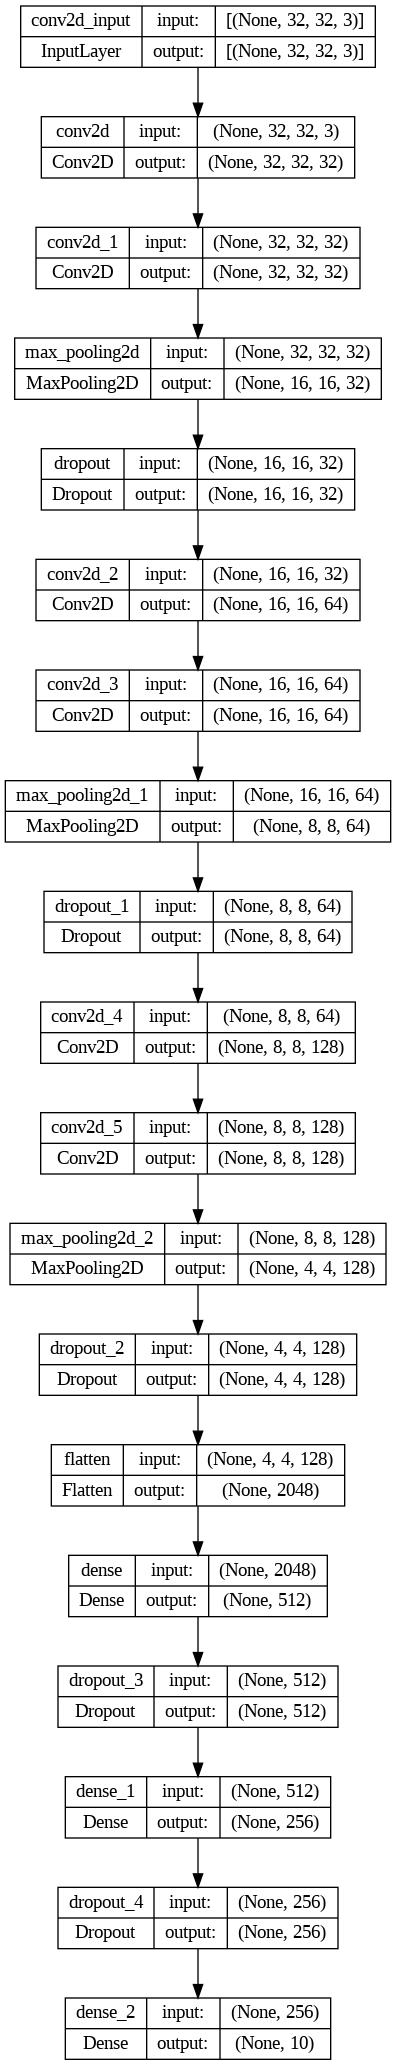

In [ ]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Treinando o modelo

In [ ]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=1000, epochs=40, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/40
45/45 [==============================] - ETA: 0s - loss: 6.3954 - accuracy: 0.1874
Epoch 1: val_accuracy improved from -inf to 0.33520, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 20s 129ms/step - loss: 6.3954 - accuracy: 0.1874 - val_loss: 2.7705 - val_accuracy: 0.3352
Epoch 2/40
45/45 [==============================] - ETA: 0s - loss: 2.2400 - accuracy: 0.3399
Epoch 2: val_accuracy improved from 0.33520 to 0.40200, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
45/45 [==============================] - 5s 107ms/step - loss: 2.2400 - accuracy: 0.3399 - val_loss: 1.8503 - val_accuracy: 0.4020
Epoch 3/40
45/45 [==============================] - ETA: 0s - loss: 1.7983 - accuracy: 0.3975
Epoch 3: val_accuracy improved from 0.40200 to 0.43920, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
45/45 [==============================] - 5s 105ms/step - loss: 1.7983 - accuracy: 0.3975 - val_loss: 1.6398 - val_accuracy: 0.4392
Epoch 4/40
45/45 [==============================] - ETA: 0s - loss: 1.6674 - accuracy: 0.4302
Epoch 4: val_accuracy improved from 0.43920 to 0.46300, saving m

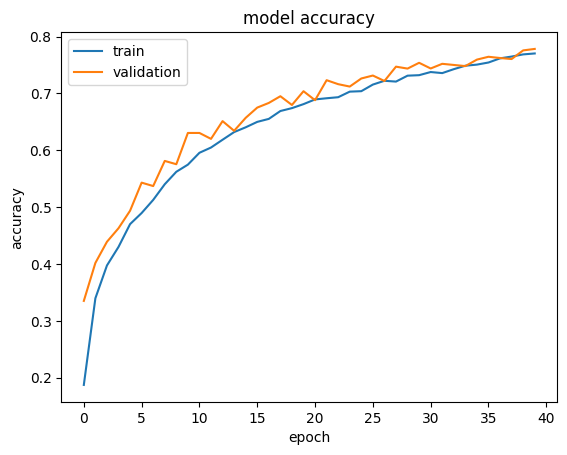

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [ ]:
model = load_model("/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7712000012397766


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_hat

array([[1.2001521e-03, 1.7158480e-03, 2.7653021e-03, ..., 4.7414498e-03,
        2.3880888e-02, 1.2948966e-03],
       [3.1256543e-03, 4.1424716e-04, 2.4207545e-06, ..., 4.3754639e-08,
        9.9645054e-01, 4.9909977e-06],
       [1.4057403e-02, 3.0886291e-03, 3.7895257e-04, ..., 6.3575615e-05,
        9.8077226e-01, 1.0563498e-03],
       ...,
       [6.7881692e-06, 1.1894291e-06, 2.0665179e-03, ..., 1.7837271e-03,
        3.2280827e-06, 4.0718433e-06],
       [2.9918747e-02, 9.2959112e-01, 1.6686244e-02, ..., 5.2844378e-04,
        1.0390009e-02, 2.1196562e-03],
       [4.6290461e-06, 5.8950349e-07, 1.3994373e-04, ..., 9.8145294e-01,
        1.9144272e-07, 1.7537131e-06]], dtype=float32)

In [ ]:
y_hat[100,:]

array([1.8611840e-03, 1.6826885e-04, 4.8819546e-02, 1.2542774e-02,
       6.3267010e-01, 2.9591238e-02, 2.2687414e-03, 2.7091682e-01,
       5.9457863e-04, 5.6671660e-04], dtype=float32)

In [ ]:
np.argmax(y_hat[100,:])

4

In [ ]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

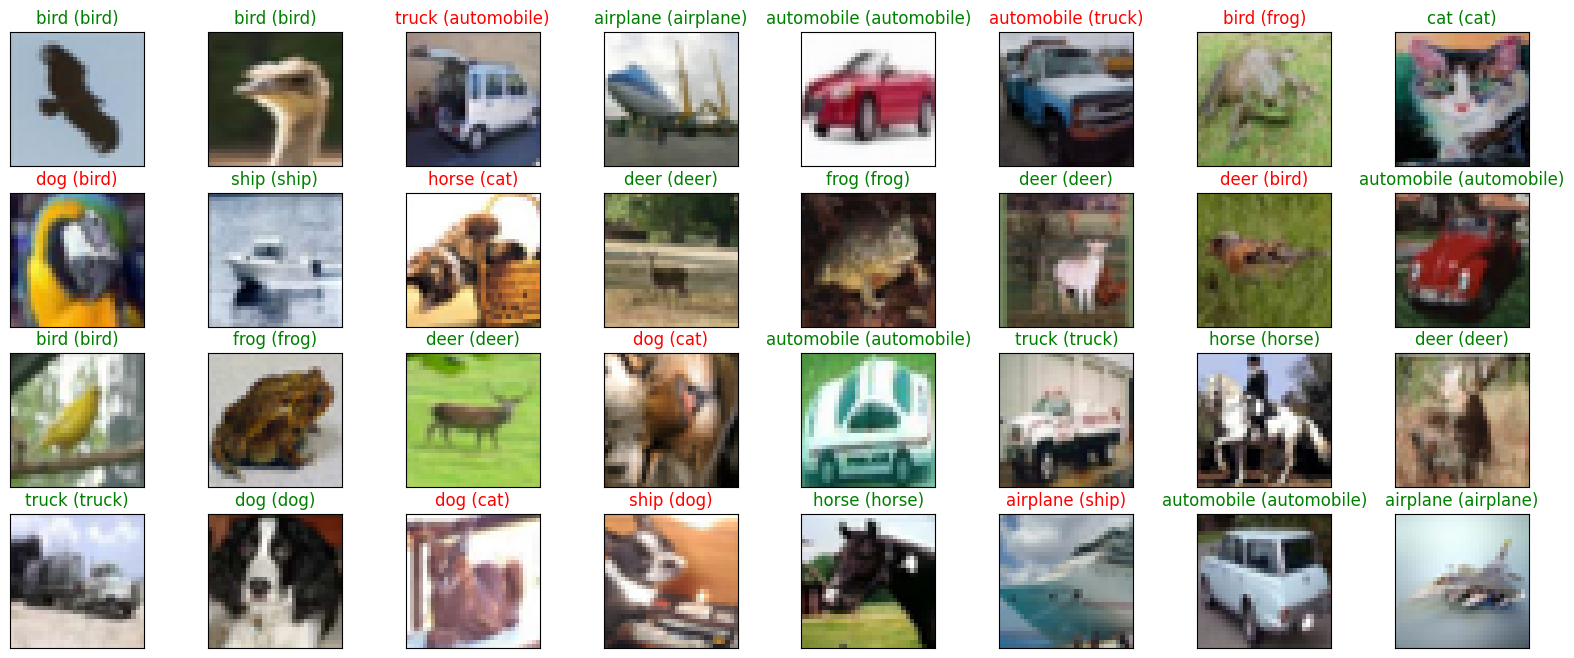

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
